# Tarea: Predicción de Cancelaciones de Reservas de Hotel

**Nombres y Apellidos:** *Escriba aqui*

## Motivación

De acuerdo con D-Edge Hospitality Solutions, parte del grupo de tecnología hotelera de Accor, las tasas globales de cancelación de reservas de hotel han alcanzado el $40\%$ en promedio. Las cancelaciones de reservas son siempre un dolor de cabeza para los hoteles, lo que a su vez hace que pierdan ganancias. Por lo tanto, sería bueno para los hoteles tener un modelo que pueda predecir si un huésped realmente cumplirá con su reserva y se alojará en el hotel o si cancelará su reserva. Esto puede ayudar a un hotel a planificar cosas como personal y requisitos de comida. Asimismo, sería bueno averiguar qué causa el aumento de las cancelaciones de reservas de hotel y cómo mitigar este aumento.

## Kaggle

El trabajo será validado directamente en Kaggle. Pueden acceder a la competencia desde el siguiente enlace:  https://www.kaggle.com/t/1becd9d402064b7ba8737391e47d70b7.

## Calificación

La nota final del trabajo está basada en el puntaje total obtenido en este notebook y esta dividido de la siguiente manera:

- Dataset  (4 puntos)
- Análisis Exploratorio de Datos (EDA) (5 puntos)
- Preparación de Datos (8 Puntos)
- Modelado (17 Puntos)
- Prueba en Kaggle (4 Puntos)

El total de puntos es $38$ $+$ $2$ puntos adicionales que se darán aquellos que participen activamente en el [foro de discusión](https://www.kaggle.com/c/reservas-de-hotel/discussion) de la competencia, ya sea preguntando sus dudas y/o ayudando a resolver dudas de otros. La escala de notas finales está dada a continuación:

|Puntaje| Nota |
|-------|-----|
|30 - 40| A |
|20 - 29| B |
|10 - 19| C |
| < 10 | D |

Aprueban los que obtienen una nota mínima de B.


## Importación de Librerías

Importe las librerías que usará en este ejercicio.

In [32]:
# TODO: Importar librerías para manipulación, visualización, 
#       preprocesamiento y modelado de datos

import pandas as pd
import numpy as np


## Dataset (4 Puntos)

El conjunto de datos contiene información de reserva para un resort (Resort Hotel) y para un hotel de ciudad (City Hotel) e incluye información acerca de cuándo se realizó la reserva, la duración de la estadía, la cantidad de adultos, niños y/o bebés, y la cantidad de espacios de estacionamiento disponibles, entre otras informaciones.

El conjuntos de datos posee $31$ características. Cada observación representa una reserva de hotel entre el $1$ de julio de $2015$ y el $31$ de agosto de $2017$, incluidas las reservas que efectivamente se cumplieron y las que se cancelaron. Como se trata de datos reales de hoteles, se eliminaron todos los datos relacionados con la identificación del hotel o del cliente. 

### Descripción de Características

|Nombre| Descripción |
|-------|-----|
|hotel |  Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled | Valor indicando si la reserva fue cancelada (1) o no (0)|
|lead_time | Número de días transcurridos entre la fecha de entrada de la reserva en la base de datos y la fecha de llegada |
|arrival_date_year | Año de llegada |
|arrival_date_month | Mes de llegada |
|arrival_date_week_number | Número de semana del año para la fecha de llegada |
|arrival_date_day_of_month | Día del mes de la fecha de llegada |
|stays_in_weekend_nights | Número de noches de fin de semana (sábado o domingo) que el huésped se hospedó o reservó para quedarse en el hotel |
|stays_in_week_nights | Número de noches semanales (de lunes a viernes) que el huésped se hospedó o reservó para hospedarse en el hotel |
|adults | Número de adultos |
|children | Numero de niños |
|babies | Numero de bebes |
|meal | Tipo de comida reservada. Las categorías se presentan en paquetes de comidas de hospitalidad estándar: <br/> - Undefined/SC - sin paquete de comida; <br/> - BB - Alojamiento y desayuno; <br/> - HB - Media pensión (desayuno y otra comida, generalmente cena); <br/> - FB - Pensión completa (desayuno, almuerzo y cena) |
|country| País de origen. Las categorías se representan en el formato ISO 3155–3:2013 |
|market_segment | Designación del segmento de mercado. En categorías, el término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos" |
|distribution_channel | Canal de distribución de reservas. El término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos" |
|is_repeated_guest | Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0) |
|previous_cancellations | Número de reservas anteriores que el cliente canceló antes de la reserva actual |
|previous_bookings_not_canceled | Número de reservas anteriores no canceladas por el cliente antes de la reserva actual |
|reserved_room_type | Código de tipo de habitación reservado. El código se presenta en lugar de la designación por razones de anonimato. |
|assigned_room_type | Código para el tipo de habitación asignada a la reserva. A veces, el tipo de habitación asignada difiere del tipo de habitación reservada debido a razones de operación del hotel (por ejemplo, sobreventa) o por solicitud del cliente. El código se presenta en lugar de la designación por razones de anonimato. |
|booking_changes | Número de cambios / modificaciones realizados en la reserva desde el momento en que la reserva se ingresó en la base de datos hasta el momento del check-in o cancelación |
|deposit_type | Indicación de si el cliente realizó un depósito para garantizar la reserva. Esta variable puede asumir tres categorías: <br/> - No Deposit (Sin depósito): no se realizó ningún depósito; <br/> - Non Refund (Sin reembolso): se realizó un depósito por el valor del costo total de la estadía; <br/> - Refundable (Reembolsable): se realizó un depósito con un valor por debajo del costo total de la estadía. |
|agent | ID de la agencia de viajes que realizó la reserva |
|company | Identificación de la empresa/entidad que realizó la reserva o responsable de pagar la reserva. Se presenta la identificación en lugar de la designación por razones de anonimato |
|days_in_waiting_list | Número de días que la reserva estuvo en la lista de espera antes de ser confirmada al cliente |
|customer_type | Tipo de reserva, asumiendo una de cuatro categorías: <br/> - Contract (Contrato): cuando la reserva tiene una asignación u otro tipo de contrato asociado; <br/> - Group (Grupo): cuando la reserva está asociada a un grupo; <br/> - Transient (Transitoria): cuando la reserva no forma parte de un grupo o contrato y no está asociada a otra reserva transitoria; <br/> - Transient-party (Parte transitoria): cuando la reserva es transitoria, pero está asociada al menos a otra reserva transitoria |
|adr | Tarifa diaria promedio tal como se define dividiendo la suma de todas las transacciones de alojamiento por el número total de noches de estadía |
|required_car_parking_spaces | Número de plazas de aparcamiento requeridas por el cliente. |
|total_of_special_requests | Número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto) |
|reservation_status | Último estado de la reserva, asumiendo una de tres categorías: <br/> - Canceled (Cancelada): la reserva fue cancelada por el cliente; <br/> - Check-Out (Salida): el cliente se ha registrado pero ya se fue; <br/> - No-Show: el cliente no se registró e informó al hotel del motivo |
|reservation_status_date | Fecha en la que se estableció el último estado. Esta variable se puede usar junto con el Estado de reserva (reservation_status) para comprender cuándo se canceló la reserva o cuándo el cliente realizó el check-out del hotel |

El dataset fue tomado del artículo: [Hotel booking demand datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191) publicado por *Nuno Antonio, Ana de Almeida y Luis Nunes*.

In [40]:
#TODO: Cargue el conjunto de datos y muestre 8 registros
# Si esta usando colab puede cargar los datos desde su drive o subir
# el archivo y descomprimirlo con el comando !unzip archivo.zip

data = pd.read_csv("train.csv")

Muestre información de cada característica, incluyendo el tipo de dato y cantidad de registros.

In [41]:
#TODO: Mostrar información de cada característica
data.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

**¿Con qué tipos de datos estamos trabajando?**

*Responder aqui...*


### Valores Faltantes

Verifique si existen valores faltantes, para ello muestre una lista de todas características y el número de valores faltantes.

In [42]:
# TODO: Revisar si existen valores NaN
data.isnull().sum()


hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             243
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8180
company                           56290
days_in_waiting_list                  0


**¿Hay características con valores faltantes (NaN)? Si es así, indique los nombres de las características y su cantidad.**

*Responder aqui...*

En caso de haber valores faltantes, reemplácelos con valores válidos para su posterior análisis.

In [45]:
# TODO: De ser necesario, reemplace los valores NaN de cada característica
#data=data[["country"]].dropna(axis = 1) 
#data[["country"]]
data["country"].fillna("No Country", inplace = True)
data["agent"].fillna(0, inplace = True)
data["company"].fillna(0, inplace = True)
data["children"].fillna(0, inplace = True)

In [46]:
# TODO: Revisar si existen valores NaN
data.isnull().sum()


hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [47]:
data

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
0,Resort Hotel,36,2015,November,47,20,0,2,2,0.0,...,38.0,0.0,0,Transient-Party,64.00,0,0,Canceled,2015-11-14,1
1,City Hotel,5,2016,May,21,19,0,3,2,2.0,...,9.0,0.0,0,Transient,230.00,0,2,Check-Out,2016-05-22,0
2,City Hotel,1,2017,March,9,2,0,3,2,0.0,...,9.0,0.0,0,Transient,108.00,0,0,Check-Out,2017-03-05,0
3,Resort Hotel,322,2017,May,21,26,2,4,2,0.0,...,240.0,0.0,0,Transient,54.00,0,1,Canceled,2017-03-09,1
4,City Hotel,57,2015,October,41,10,2,1,2,0.0,...,9.0,0.0,0,Contract,94.50,0,2,Check-Out,2015-10-13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59690,City Hotel,2,2016,July,28,8,0,1,2,0.0,...,0.0,40.0,0,Transient,77.00,1,0,Check-Out,2016-07-09,0
59691,City Hotel,91,2017,April,16,20,2,3,2,0.0,...,9.0,0.0,0,Transient,135.00,0,0,Check-Out,2017-04-25,0
59692,City Hotel,74,2016,December,53,27,0,3,3,0.0,...,22.0,0.0,0,Transient,92.65,0,0,Check-Out,2016-12-30,0
59693,Resort Hotel,130,2015,August,31,1,2,5,2,0.0,...,240.0,0.0,0,Transient,120.60,0,2,Canceled,2015-05-19,1


## Análisis Exploratorio de Datos (EDA) (5 puntos)

Realizar el análisis de datos haciendo uso de visualizaciones cuando sea necesario. Para ello se deberán responder al mayor número de preguntas dadas a continuación (mínimo 5):

- ¿Cuál es la tarifa diaria promedio mensual por persona durante el año?
- ¿De dónde vienen los huéspedes?
- ¿Cuánto pagan los huéspedes por una habitación por noche?
- ¿Cuánto tiempo se quedan los huéspedes en los hoteles?
- ¿Qué mes tiene el mayor número de reservas?
- ¿Qué tipo de cliente contribuye a la mayor cantidad de cancelaciones de reservas de hotel?
- ¿Cuántas reservas fueron canceladas?
- ¿Qué mes tiene el mayor número de cancelaciones?

Puede proponer otro tipo de preguntas que ayuden en su análisis, esto implicará un aumento en el puntaje dependiendo del análisis realizado. 

**Para cada pregunta elegida y/o propuesta mostrar visualizaciones (cuando sea posible) y detallar que información importante puede extraer a partir de cada visualización.** A continuación, se dará un ejemplo sobre como realizar el análisis.


### ¿Cuál es la tarifa diaria promedio mensual por persona durante el año?

Usamos las características `hotel`, `arrival_date_month` y `adr`(tarifa diaria promedio). Actualmente la característica `adr` contiene valores de la tarifa diaria promedio para todas las personas en general, para obtenerlo por persona usaremos las características `adults` y `children` para normalizar dicha característica. Consideramos adultos y niños por que normalmente es necesario pagar por cada uno de ellos en la reserva.

Antes de normalizar verifiquemos si tenemos valores válidos en todas las filas de las características `adults` y `children`.

In [48]:
print('Mínimo número de adultos: %d, niños: %d' % (data['adults'].min(), data['children'].min()))

Mínimo número de adultos: 0, niños: 0


Como podemos observar, tenemos filas que no tienen número de adultos y de niños por tanto podemos eliminar estas filas debido a que son reservas sin personas lo cual no es correcto. 

In [49]:
# Obtenemos indices de filas que no contienen ni adultos ni niños
invalid_indices = list(data.loc[data["adults"] + data["children"] == 0].index)

# Removemos las filas inválidas
data.drop(data.index[invalid_indices], inplace=True)

# Reiniciamos los indices del dataframe
data.reset_index(inplace=True, drop=True)

Ahora si procederemos con la normalización de tarifas diarias por persona y ordenaremos la data por mes para visualizar correctamente:

In [50]:
# Normalizamos las tarifas diarias por persona y creamos característica adr_per_person.
#
# Si tiene pensado mantener esta característica en el modelado, tiene que adicionarla
# a la data de test (Sección final del trabajo). Sino puede eliminarla mas adelante
# y solamente usarla en la parte de visualización.
data['adr_per_person'] = data['adr'] / (data['adults'] + data['children'])

# Consideramos solamente datos de reservas que no fueron cancelados
data_no_canceled = data[ data['is_canceled'] == 0]

# Seleccionamos las características que usaremos en la visualización
hotel_adr_month = data_no_canceled[['hotel', 'arrival_date_month', 'adr_per_person']]

# Necesitamos ordenar la variable categórica 'arrival_date_month'
ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]

# Usamos conversión categórica de 'pandas' para definir el orden
hotel_adr_month["arrival_date_month"] = pd.Categorical(hotel_adr_month["arrival_date_month"], categories=ordered_months, ordered=True)

# Realizamos el ordenamiento respectivo
hotel_adr_month = hotel_adr_month.sort_values("arrival_date_month")

# Mostramos la data
hotel_adr_month.head()

C:\Users\Paul\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,hotel,arrival_date_month,adr_per_person
15855,City Hotel,January,67.15
8220,City Hotel,January,46.80
52631,City Hotel,January,0.00
8248,City Hotel,January,47.50
36082,City Hotel,January,48.50


Mostramos la gráfica correspondiente:

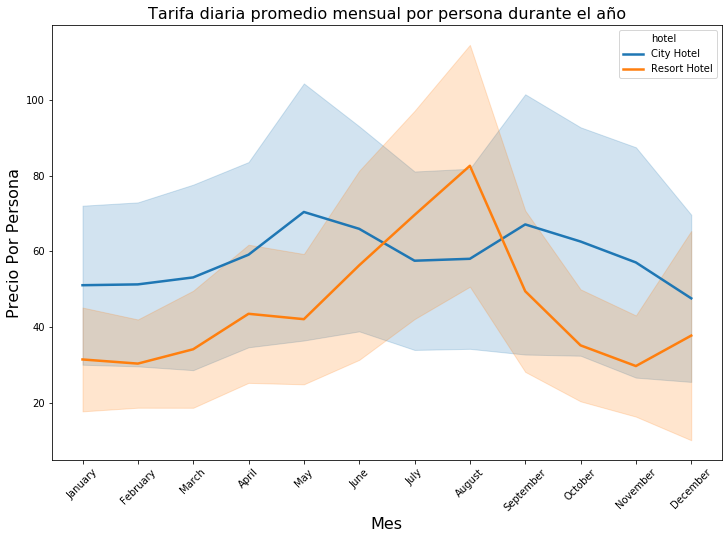

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_per_person", hue="hotel", data=hotel_adr_month, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Tarifa diaria promedio mensual por persona durante el año", fontsize=16)
plt.xlabel("Mes", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Precio Por Persona", fontsize=16)
plt.show()

Claramente podemos observar que los precios de Resort Hotel son mayores entre los meses de Junio a Setiembre (verano en Portugal). Por otro lado, los precios de City Hotel son mas estables con alzas en los meses de Mayo y Setiembre (primavera y otoño en Portugal).

### ¿De dónde vienen los huéspedes?

Usar las características `is_canceled` y `country` para el análisis. Se recomienda realizar diferentes visualizaciones de la data usando porcentajes y diferentes gráficos.

In [99]:
dfCanceladosCountry= data[["is_canceled","country"]]

In [100]:
dfCanceladosCountry.groupby('is_canceled').count()

,country
is_canceled,
0,37505
1,22095


In [101]:
dfpaisesCancelados=dfCanceladosCountry.groupby('country').count()
dfpaisesCancelados=dfpaisesCancelados.sort_values('is_canceled',ascending=False) #ordenamos ascendenemente
dfpaisesCancelados

,is_canceled
country,
PRT,24223
GBR,6034
FRA,5234
ESP,4223
DEU,3600
...,...
BWA,1
SLE,1
SLV,1


In [102]:
dfpaisesCancelados=dfpaisesCancelados[:7] #graficamos los primeros 7

In [103]:
dfpaisesCancelados

,is_canceled
country,
PRT,24223
GBR,6034
FRA,5234
ESP,4223
DEU,3600
ITA,1963
IRL,1667


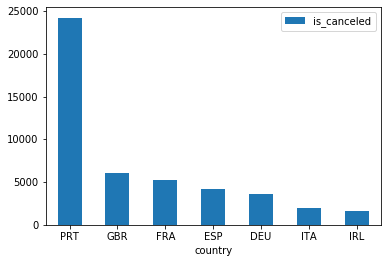

In [104]:
dfpaisesCancelados.plot.bar(rot=0)

**¿Qué países tienen el mayor número de visitantes del hotel?**

PRT= Portugal
GBR= Reino Unido
FRA= Francia
ESP= España


### ¿Cuánto pagan los huéspedes por una habitación por noche?

Puede hacer uso de la característica tarifa diaria promedio por persona (`adr_per_person`) que adicionamos anteriormente y mostrar el precio promedio por tipo de hospedaje (Resort Hotel o City Hotel).

In [107]:
hotel_adr_month.head()

,hotel,arrival_date_month,adr_per_person
15855,City Hotel,January,67.15
8220,City Hotel,January,46.80
52631,City Hotel,January,0.00
8248,City Hotel,January,47.50
36082,City Hotel,January,48.50


In [108]:
 hotel_adr_month.drop(['arrival_date_month'], axis=1)

,hotel,adr_per_person
15855,City Hotel,67.150000
8220,City Hotel,46.800000
52631,City Hotel,0.000000
8248,City Hotel,47.500000
36082,City Hotel,48.500000
...,...,...
9415,Resort Hotel,29.000000
57024,City Hotel,43.666667
7282,City Hotel,30.250000
7316,City Hotel,33.440000


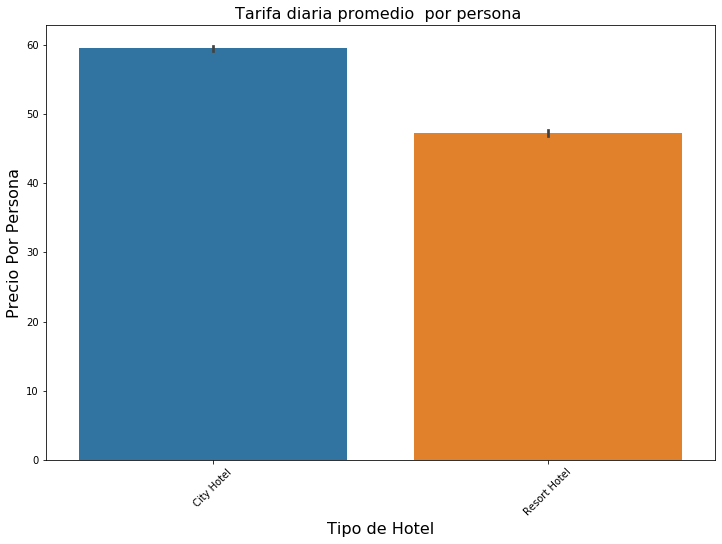

In [113]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "hotel", y="adr_per_person", data=hotel_adr_month)
plt.title("Tarifa diaria promedio  por persona ", fontsize=16)
plt.xlabel("Tipo de Hotel", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Precio Por Persona", fontsize=16)
plt.show()

In [114]:
hotel_adr_month.groupby('hotel').mean()

,adr_per_person
hotel,
City Hotel,59.466944
Resort Hotel,47.249736


*Responder aqui la pregunta y su análisis*
* En City Hotel en promedio pagan: 59.466944
* En Resort Hotel en promedio pagan: 47.249736

### ¿Cuánto tiempo se quedan los huéspedes en los hoteles?

Usar las características `stays_in_weekend_nights` y `stays_in_week_nights` para el análisis.

In [119]:

# Seleccionamos las características que usaremos en la visualización
hotel_adr_month = data_no_canceled[['stays_in_weekend_nights', 'stays_in_week_nights', 'adr_per_person','hotel']]
hotel_adr_month


,stays_in_weekend_nights,stays_in_week_nights,adr_per_person,hotel
1,0,3,57.500000,City Hotel
2,0,3,54.000000,City Hotel
4,2,1,47.250000,City Hotel
5,0,1,26.000000,Resort Hotel
8,0,1,47.000000,Resort Hotel
...,...,...,...,...
59591,2,5,44.100000,Resort Hotel
59595,0,1,38.500000,City Hotel
59596,2,3,67.500000,City Hotel
59597,0,3,30.883333,City Hotel


In [133]:
hotel_adr_month=hotel_adr_month.drop(['adr_per_person'], axis=1)
hotel_adr_month=hotel_adr_month.groupby('hotel').mean()
hotel_adr_month

,stays_in_weekend_nights,stays_in_week_nights
hotel,,
City Hotel,0.801859,2.123459
Resort Hotel,1.130598,3.013074


*Responder aqui la pregunta y su análisis*

Para City Hotel el proemdio de personas que vayan en stays_in_weekend_nights son: 0.801859 y en  stays_in_week_nights son: 2.123459
Para Resort Hotel	 el proemdio de personas que vayan en stays_in_weekend_nights son: 0.1.130598 y en  stays_in_week_nights son: 2.3.013074


### ¿Qué mes tiene el mayor número de reservas?

Usar las características `arrival_date_month` y `hotel` para el análisis.


In [146]:
# Seleccionamos las características que usaremos en la visualización
hotel_adr_month = data_no_canceled[['hotel', 'arrival_date_month', 'adr_per_person']]

# Necesitamos ordenar la variable categórica 'arrival_date_month'
ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]

# Usamos conversión categórica de 'pandas' para definir el orden
hotel_adr_month["arrival_date_month"] = pd.Categorical(hotel_adr_month["arrival_date_month"], categories=ordered_months, ordered=True)

# Realizamos el ordenamiento respectivo
hotel_adr_month = hotel_adr_month.sort_values("arrival_date_month")

# Mostramos la data
hotel_adr_month.head()

C:\Users\Paul\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,hotel,arrival_date_month,adr_per_person
15855,City Hotel,January,67.15
8220,City Hotel,January,46.80
52631,City Hotel,January,0.00
8248,City Hotel,January,47.50
36082,City Hotel,January,48.50


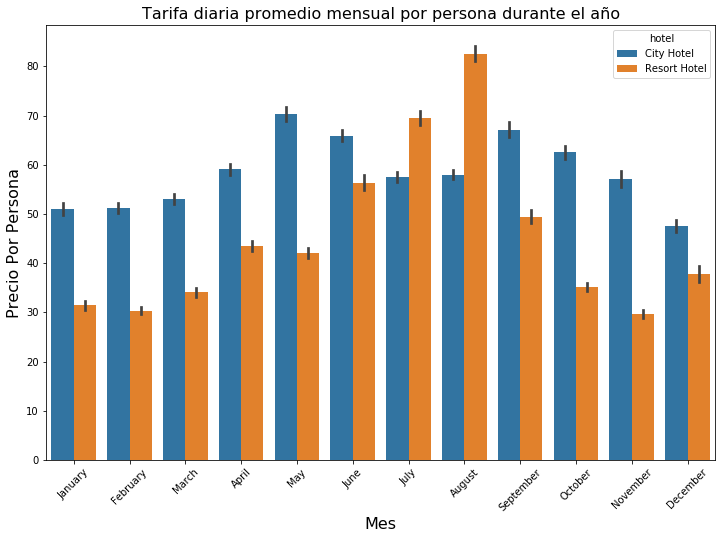

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(x = "arrival_date_month", y="adr_per_person", hue="hotel", data=hotel_adr_month)
plt.title("Tarifa diaria promedio mensual por persona durante el año", fontsize=16)
plt.xlabel("Mes", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Precio Por Persona", fontsize=16)
plt.show()

In [154]:
hotel_adr_month.groupby('arrival_date_month').mean().sort_values('adr_per_person',ascending=False)

,adr_per_person
arrival_date_month,
August,67.349224
June,62.861476
July,62.332950
September,61.208906
May,60.479825
April,52.983780
October,52.447165
March,45.700602
November,45.448673


*Responder aqui la pregunta y su análisis*
* El mes que tiene mayor número de reservas es Agosto con 67.349224 y es de tipo: Resort Hotel

### ¿Qué tipo de cliente contribuye a la mayor cantidad de cancelaciones de reservas de hotel?

Usar las características `customer_type`, `is_canceled` y `hotel` para el análisis. Mostrar visualizaciones por tipo de cliente.


In [164]:
# Consideramos solamente datos de reservas que no fueron cancelados
#data_no_canceled = data[ data['is_canceled'] == 0]

# Seleccionamos las características que usaremos en la visualización
hotel_adr_month = data[['hotel', 'customer_type', 'is_canceled']]


In [168]:
hotel_adr_month.groupby('customer_type').count().sort_values('is_canceled',ascending=False)

,hotel,is_canceled
customer_type,,
Transient,44723,44723
Transient-Party,12497,12497
Contract,2076,2076
Group,304,304


*Responder aqui la pregunta y su análisis*
* El tipo de cliente que mayor cancela es de Transient

### ¿Cuántas reservas fueron canceladas?

Usar las características `is_canceled` y `hotel` para el análisis. Mostrar porcentajes de reservas canceladas por tipo de hotel (Resort y City).

In [171]:
cancelaron=hotel_adr_month.groupby('customer_type').count()
cancelaron

,hotel,is_canceled
customer_type,,
Contract,2076,2076
Group,304,304
Transient,44723,44723
Transient-Party,12497,12497


In [173]:
cancelaron.sum()

hotel          59600
is_canceled    59600
dtype: int64

*Responder aqui la pregunta y su análisis*
Cancelaron 59.600 


### ¿Qué mes tiene el mayor número de cancelaciones?

Usar las características `arrival_date_month`, `is_canceled` y `hotel` para el análisis.

In [194]:
# Consideramos solamente datos de reservas que  fueron cancelados
data_no_canceled = data[ data['is_canceled'] == 1]

# Seleccionamos las características que usaremos en la visualización
hotel_adr_month = data_no_canceled[['hotel', 'arrival_date_month', 'is_canceled']]

In [198]:

cancelaron=hotel_adr_month.groupby('arrival_date_month').count().sort_values('is_canceled',ascending=False)
#cancelaron=cancelaron.drop('hotel',axis=1)
cancelaron

,hotel,is_canceled
arrival_date_month,,
August,2626,2626
May,2384,2384
July,2337,2337
April,2285,2285
June,2218,2218
October,2143,2143
September,2057,2057
March,1564,1564
February,1367,1367


*Responder aqui la pregunta y su análisis*
* Agosto es el que tiene mayor número de  cancelaciones

## Preparación de Datos (8 Puntos)

Luego de haber realizado el análisis de los datos, procederemos con la preparación final antes del modelado. Recuerde que la mayor parte de los modelos de Machine Learning reciben como entrada solamente valores numéricos. Sus tareas en esta fase serán:

1. (2 puntos) Agregar y/o eliminar características.

2. (Opcional - 2 puntos) Detectar y tratar valores atípicos (outliers).
3. (1 punto) Separar características de variable objetivo (is_canceled)
4. (1 punto) Preprocesar características númericas.
5. (1 punto) Preprocesar características categóricas.
6. (1 punto) Crear una función o clase que permita hacer toda la preparación de datos para un dataset determinado. Usaremos está función para preparar los datos de entrenamiento y prueba por separado. También puede hacer uso de la clase [Pipeline](https://scikit-learn.org/stable/modules/compose.html) de scikit-learn (Recomendado).

## Modelado (17 Puntos)

En esta estapa nos dedicaremos a usar nuestros conocimientos de Machine Learning para entrenar diferentes modelos y usar diferentes técnicas para mejorar los resultados. La evaluación estará basada en la métrica accuracy.

1. (1 punto) Para los siguientes pasos evaluar su modelo con validación cruzada, usando la métrica de accuracy.
2. (1 punto por clasificador) Utilize como mínimo $2$ clasificadores aprendidos para evaluar su solución (K-NN, Naive Bayes, Logistic Regression, Decision Trees). Muestre los resultados obtenidos e indique por qué algunos clasificadores son mejores que otros.
3. (1 punto) Realice la búsqueda de hiperparámetros para cada modelo (Grid Search o Random Search) y vuelva a mostrar sus resultados.
4. (1 punto por modelo) Utilize modelos de ensamble para ver si podemos mejorar nuestra solución (Bagging, Boosting y Stacking). Específique los modelos que está usando y muestre resultados.
5. (Opcional - 1 punto por modelo) Utilize una o más de las siguientes librerías para evaluar su modelo con Gradient Boosting: [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_intro.html), [CatBoost](https://catboost.ai/docs/concepts/python-usages-examples.html).
6. (Opcional - 5 puntos) Importancia de Características:

  6.1. (2 puntos) Obtenga la importancia de características usando Decision Trees y/o Random Forest. Muestre la importancia ordenada de mayor a menor y vuelva a entrenar su modelo con las características más importantes.

  6.2. (1 punto)  Responda las siguientes preguntas: ¿Cuales son las características más importantes? ¿Cuántas características está considerando en su nuevo modelo y por qué? ¿Usando menos características mejora la métrica de clasificación?

  6.3. (2 puntos) Analice las características más importantes haciendo uso de visualizaciones y explique sus conclusiones.

Las tareas opcionales si bien no son obligatorias, son muy recomendables para que tengan un mejor conocimiento de las librerías más usadas a parte de scikit-learn y para entender mejor la importancia de características que algunos modelos nos brindan.

*Para instalar nuevas librerías en colab puede hacer uso del comando !pip install. Por ejemplo para instalar CatBoost, podemos hacerlo de la siguiente manera: !pip install catboost*

**Importante:** Al entrenar sus modelos puede que en algún momento lleguen a obtener $100\%$ de accuracy durante el entrenamiento, incluso con validación cruzada. Esto puede deberse a un problema de **data leakage** donde nuestra data de entrenamiento contiene información de la variable que deseamos predecir (`is_canceled`). Para ello es recomendable entender las características y revisar cuales están ocasionando el data leakage. Ejemplos de data leakage pueden ser encontrados aqui: https://www.kaggle.com/alexisbcook/data-leakage

### Prueba en Kaggle (4 Puntos)

Luego de haber finalizado la preparación y modelado, evaluaremos sus resultados directamente en [Kaggle](https://www.kaggle.com/t/1becd9d402064b7ba8737391e47d70b7), para ello será necesario realizar los siguientes pasos:

1. (1 punto) Cargue la data de prueba (test).

2. (1 punto) Aplique las transformaciones usadas en la preparación de datos mediante la función, clase o Pipeline de scikit-learn que haya implementado en la parte de *preparación de datos*.
3. (1 punto) Use el mejor modelo previamente entrenado en la data de entrenamiento y realice predicciones sobre la data de prueba.
4. (1 punto) Guarde sus resultados en un archivo resultados.csv y subalo a la [competencia](https://www.kaggle.com/t/1becd9d402064b7ba8737391e47d70b7) de la tarea desde el siguiente enlace. Puede encontrar la función que genera el archivo en la parte inferior. 


In [1]:
# TODO: Importar librerías para manipulación, visualización, 
#       preprocesamiento y modelado de datos

import pandas as pd
import numpy as np
#TODO: Cargue el conjunto de datos y muestre 8 registros
# Si esta usando colab puede cargar los datos desde su drive o subir
# el archivo y descomprimirlo con el comando !unzip archivo.zip

data = pd.read_csv("train.csv")
#TODO: Mostrar información de cada característica
#data.dtypes

In [2]:
agentProm=data["agent"].mean()
compaProm=data["company"].mean()
childrenProm=data["children"].mean()

In [3]:
# TODO: De ser necesario, reemplace los valores NaN de cada característica
#data=data[["country"]].dropna(axis = 1) 
#data[["country"]]
data["country"].fillna("No Country", inplace = True)
data["agent"].fillna(agentProm, inplace = True)
data["company"].fillna(compaProm, inplace = True)
data["children"].fillna(childrenProm, inplace = True)

In [4]:
# TODO: Revisar si existen valores NaN
data.isnull().sum()


hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [5]:
data.groupby('arrival_date_month').count() #variable categórica   

,hotel,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
arrival_date_month,,,,,,,,,,,,,,,,,,,,,
April,5554,5554,5554,5554,5554,5554,5554,5554,5554,5554,...,5554,5554,5554,5554,5554,5554,5554,5554,5554,5554
August,6922,6922,6922,6922,6922,6922,6922,6922,6922,6922,...,6922,6922,6922,6922,6922,6922,6922,6922,6922,6922
December,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405,...,3405,3405,3405,3405,3405,3405,3405,3405,3405,3405
February,4039,4039,4039,4039,4039,4039,4039,4039,4039,4039,...,4039,4039,4039,4039,4039,4039,4039,4039,4039,4039
January,2936,2936,2936,2936,2936,2936,2936,2936,2936,2936,...,2936,2936,2936,2936,2936,2936,2936,2936,2936,2936
July,6252,6252,6252,6252,6252,6252,6252,6252,6252,6252,...,6252,6252,6252,6252,6252,6252,6252,6252,6252,6252
June,5437,5437,5437,5437,5437,5437,5437,5437,5437,5437,...,5437,5437,5437,5437,5437,5437,5437,5437,5437,5437
March,4926,4926,4926,4926,4926,4926,4926,4926,4926,4926,...,4926,4926,4926,4926,4926,4926,4926,4926,4926,4926
May,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,...,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986


In [6]:
data=data.replace({ "January": 1, "February": 2, "March": 3, "April": 4,
              "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12})
data=data.replace({ "BB": 1, "FB": 2, "HB": 3, "SC": 4,"Undefined": 5})
data=data.replace({ 5: 1, "Aviation": 2, "Complementary": 3, "Corporate": 4,"Direct": 5,"Groups": 6,"Offline TA/TO": 7,"Online TA": 8})
data=data.replace({ 4: 1, 5: 2, "GDS": 3, "TA/TO": 4})
#data.groupby('assigned_room_type').count() #variable categórica 
data=data.replace({ "I": 11, "K": 12})

In [7]:
data=data.replace({ "No Deposit": 1, "Non Refund": 2, "Refundable": 3})

In [8]:
data.groupby('deposit_type').count() #variable categórica   

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
deposit_type,,,,,,,,,,,,,,,,,,,,,
1,52363,52363,52363,52363,52363,52363,52363,52363,52363,52363,...,52363,52363,52363,52363,52363,52363,52363,52363,52363,52363
2,7240,7240,7240,7240,7240,7240,7240,7240,7240,7240,...,7240,7240,7240,7240,7240,7240,7240,7240,7240,7240
3,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92


In [9]:
data=data.replace({ "Contract": 1, "Group": 2, "Transient": 3, "Transient-Party": 4})
data=data.replace({ "Canceled": 1, "Check-Out": 2, "No-Show": 3})
data=data.replace({ "City Hotel": 1, "Resort Hotel": 2})
#data.groupby('reserved_room_type').count() #variable categórica 
data=data.replace({ "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "L": 9, "P": 10})

In [10]:
data.groupby('hotel').count() #variable categórica   

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
hotel,,,,,,,,,,,,,,,,,,,,,
1,39679,39679,39679,39679,39679,39679,39679,39679,39679,39679,...,39679,39679,39679,39679,39679,39679,39679,39679,39679,39679
2,20016,20016,20016,20016,20016,20016,20016,20016,20016,20016,...,20016,20016,20016,20016,20016,20016,20016,20016,20016,20016


In [11]:
data=data.drop(['reservation_status_date'], axis=1) # no importante para el análisis

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59695 entries, 0 to 59694
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           59695 non-null  int64  
 1   lead_time                       59695 non-null  int64  
 2   arrival_date_year               59695 non-null  int64  
 3   arrival_date_month              59695 non-null  int64  
 4   arrival_date_week_number        59695 non-null  int64  
 5   arrival_date_day_of_month       59695 non-null  int64  
 6   stays_in_weekend_nights         59695 non-null  int64  
 7   stays_in_week_nights            59695 non-null  int64  
 8   adults                          59695 non-null  int64  
 9   children                        59695 non-null  float64
 10  babies                          59695 non-null  int64  
 11  meal                            59695 non-null  int64  
 12  country                         

In [13]:
data.shape

(59695, 31)

In [14]:
countrys=pd.get_dummies(data["country"]) # aplicamos get dummies en la columna country
#countrys

In [15]:
countrys= countrys.astype('float64')
countrys.shape

(59695, 158)

In [16]:
data=data.drop(['country'], axis=1)
#data=data.append(countrys)  # YA NO AGREGAMOS PORQUE EN LA DATA DE TRAIN TIENE 158 PAÍSES, MIENTRAS QUE EN LA DE TEST TIENE 156

In [17]:
data=data.drop(['children'], axis=1) #Número de niños
data=data.drop(['babies'], axis=1) #Número de babys
data=data.drop(['booking_changes'], axis=1) #Número de cambios / modificaciones realizados en la reserva desde el momento en que la reserva se ingresó en la base de datos hasta el momento del check-in o cancelación
data=data.drop(['arrival_date_week_number'], axis=1) #Número de semana del año para la fecha de llegada
data=data.drop(['distribution_channel'], axis=1) #Canal de distribución de reservas. El término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos"

In [18]:
data.fillna(0, inplace = True)

In [19]:
dataTempBackup=data
data.dtypes

hotel                               int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
meal                                int64
market_segment                      int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
assigned_room_type                  int64
deposit_type                        int64
agent                             float64
company                           float64
days_in_waiting_list                int64
customer_type                       int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status                

In [20]:
data.shape

(59695, 25)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('is_canceled',axis=1), 
                                                    data['is_canceled'], test_size=0.30, 
                                                    random_state=101)

In [22]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\Paul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82     11305
           1       0.71      0.62      0.66      6604

    accuracy                           0.76     17909
   macro avg       0.75      0.73      0.74     17909
weighted avg       0.76      0.76      0.76     17909



In [24]:
# Función para guardar sus predicciones en un archivo .csv
# siguiendo el formato requerido para subirlo a Kaggle
def save_submission_file(model, X_test, filename="submission.csv"):
  submission_df = {"id": X_test.index,
                   "is_canceled": model.predict(X_test)}
  submission = pd.DataFrame(submission_df)
  submission.to_csv(filename,index=False)

# TODO: Haga uso de la función anterior para generar su archivo de predicciones
# y subalos a Kaggle  

In [25]:
save_submission_file(logmodel, X_test, filename="submission.csv")

In [168]:
X_test.shape

(17909, 29)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [51]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [52]:
knn.score(X_test, y_test)

0.7722374225249874

In [53]:
#knn.score(X_test_, y_test_)

In [54]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
#from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

C:\Users\Paul\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [56]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
y_pred = dt.predict(X_test)

In [58]:
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [59]:

confusion_matrix(y_test, y_pred)

array([[11305,     0],
       [    0,  6604]], dtype=int64)

In [60]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.76465662 0.75792749 0.75613258 0.75134618 0.75900443]
cv_scores mean:0.757813458020428


In [61]:
RESULTADOS:
    * LOGISTIC REGRESSION: 0.88
    * KNN:0.7714556926684907
    * TREE DECISION:0.7572870277414296

SyntaxError: invalid syntax (<ipython-input-61-337b62de7ab8>, line 1)

In [87]:
#######################################################   DATA TEST    ###################################################################################################

In [26]:
# TODO: Importar librerías para manipulación, visualización, 
#       preprocesamiento y modelado de datos
import pandas as pd
import numpy as np
dataTest = pd.read_csv("test.csv")
#TODO: Mostrar información de cada característica
#data.dtypes
# TODO: Revisar si existen valores NaN
dataTest.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             245
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8160
company                           56303
days_in_waiting_list                  0


In [27]:
# TODO: De ser necesario, reemplace los valores NaN de cada característica
#REMPLAZAMOS LOS DATOS FALTANTES CON SU PROMEDIO
agentProm=dataTest["agent"].mean() 
compaProm=dataTest["company"].mean()
childrenProm=dataTest["children"].mean()
dataTest["country"].fillna("No Country", inplace = True)
dataTest["agent"].fillna(agentProm, inplace = True)
dataTest["company"].fillna(compaProm, inplace = True)
dataTest["children"].fillna(childrenProm, inplace = True)

In [28]:
dataTest=dataTest.replace({ "January": 1, "February": 2, "March": 3, "April": 4,
              "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12})
dataTest=dataTest.replace({ "BB": 1, "FB": 2, "HB": 3, "SC": 4,"Undefined": 5})
dataTest=dataTest.replace({ 5: 1, "Aviation": 2, "Complementary": 3, "Corporate": 4,"Direct": 5,"Groups": 6,"Offline TA/TO": 7,"Online TA": 8})
dataTest=dataTest.replace({ 4: 1, 5: 2, "GDS": 3, "TA/TO": 4})
#data.groupby('assigned_room_type').count() #variable categórica 
dataTest=dataTest.replace({ "I": 11, "K": 12})
dataTest=dataTest.replace({ "No Deposit": 1, "Non Refund": 2, "Refundable": 3})
dataTest=dataTest.replace({ "Contract": 1, "Group": 2, "Transient": 3, "Transient-Party": 4})
dataTest=dataTest.replace({ "Canceled": 1, "Check-Out": 2, "No-Show": 3})
dataTest=dataTest.replace({ "City Hotel": 1, "Resort Hotel": 2})
#data.groupby('reserved_room_type').count() #variable categórica 
dataTest=dataTest.replace({ "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "L": 9, "P": 10})

In [29]:
dataTest=dataTest.drop(['reservation_status_date'], axis=1) # no importante para el análisis

In [30]:
dataTest.groupby('reservation_status').count() #variable categórica   

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
reservation_status,,,,,,,,,,,,,,,,,,,,,
Unknown,59695,59695,59695,59695,59695,59695,59695,59695,59695,59695,...,59695,59695,59695,59695,59695,59695,59695,59695,59695,59695


In [31]:
dataTest=dataTest.replace({ "Unknown": 0}) #remplazamos el campo de reservation_status  que es explícito para la data de test
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59695 entries, 0 to 59694
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           59695 non-null  int64  
 1   lead_time                       59695 non-null  int64  
 2   arrival_date_year               59695 non-null  int64  
 3   arrival_date_month              59695 non-null  int64  
 4   arrival_date_week_number        59695 non-null  int64  
 5   arrival_date_day_of_month       59695 non-null  int64  
 6   stays_in_weekend_nights         59695 non-null  int64  
 7   stays_in_week_nights            59695 non-null  int64  
 8   adults                          59695 non-null  int64  
 9   children                        59695 non-null  float64
 10  babies                          59695 non-null  int64  
 11  meal                            59695 non-null  int64  
 12  country                         

In [32]:
dataTest.shape

(59695, 30)

In [33]:
countrys=pd.get_dummies(dataTest["country"]) # aplicamos get dummies en la columna country
#countrys

In [34]:
countrys.shape

(59695, 156)

In [35]:
countrys= countrys.astype('float64')

In [36]:
dataTest=dataTest.drop(['country'], axis=1) #eliminamos la columna que tiene nombres de países
#dataTest=dataTest.append(countrys) #agregamos la data de países con números (data normalizada) #YA NO SE INCORPORA PORQUE  EN LA DATA DE TRAIN TIENE 158 PAÍSES, MIENTRAS QUE EN LA DE TEST TIENE 156

In [37]:
dataTest=dataTest.drop(['children'], axis=1) #Número de niños
dataTest=dataTest.drop(['babies'], axis=1) #Número de babys
dataTest=dataTest.drop(['booking_changes'], axis=1) #Número de cambios / modificaciones realizados en la reserva desde el momento en que la reserva se ingresó en la base de datos hasta el momento del check-in o cancelación
dataTest=dataTest.drop(['arrival_date_week_number'], axis=1) #Número de semana del año para la fecha de llegada
dataTest=dataTest.drop(['distribution_channel'], axis=1) #Canal de distribución de reservas. El término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos"

In [38]:
dataTest.fillna(0, inplace = True)

In [39]:
dataTest.dtypes

hotel                               int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
meal                                int64
market_segment                      int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
assigned_room_type                  int64
deposit_type                        int64
agent                             float64
company                           float64
days_in_waiting_list                int64
customer_type                       int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status                

In [40]:
dataTest.shape

(59695, 24)

In [41]:
resultado= logmodel.predict(dataTest)

In [42]:
resultado

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [43]:
resultado.shape

(59695,)

In [44]:
# Función para guardar sus predicciones en un archivo .csv
# siguiendo el formato requerido para subirlo a Kaggle
def save_submission_file(model, X_test, filename="submission.csv"):
  submission_df = {"id": X_test.index,
                   "is_canceled": model.predict(X_test)}
  submission = pd.DataFrame(submission_df)
  submission.to_csv(filename,index=False)

# TODO: Haga uso de la función anterior para generar su archivo de predicciones
# y subalos a Kaggle  

In [45]:
dataGuardad=save_submission_file(logmodel, dataTest, filename="submissionTest.csv")

In [46]:
dataGuardad=pd.read_csv("submissionTest.csv")

In [47]:
dataGuardad.shape

(59695, 2)

In [62]:
dataGuardadKNN=save_submission_file(knn, dataTest, filename="submissionTestKNN.csv")

In [63]:
dataGuardadKNN=pd.read_csv("submissionTestKNN.csv")

In [64]:
dataGuardadKNN.shape

(59695, 2)

In [65]:
dataGuardadDT=save_submission_file(dt, dataTest, filename="submissionTestDT.csv")

In [66]:
dataGuardadDT=pd.read_csv("submissionTestDT.csv")
dataGuardadDT.shape

(59695, 2)